In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

text=open('carmilla.txt','r')
text=text.read()

In [2]:
text=text.lower() #string all lower case
text=re.sub(r'\W+', ' ', text) #remove all special characers including newline (/n)
text=text.replace(' ','-') # turn all space to '-' for easier representation

rm=['1','2','3','4','5','6','7','8','9','0','_','é']

for i in rm:
    text=text.replace(i,'')

text=pd.Series([*text])

In [3]:
single_frq=pd.Series(text.value_counts())
single_frq=single_frq.div(single_frq.sum(axis=0))
single_frq=single_frq.sort_index(ascending=True)

-    0.187489
a    0.067259
b    0.010835
c    0.022142
d    0.037476
e    0.102354
f    0.016764
g    0.016901
h    0.046361
i    0.057399
j    0.001131
k    0.006144
l    0.033593
m    0.022920
n    0.055335
o    0.059690
p    0.014221
q    0.000844
r    0.050501
s    0.049298
t    0.070358
u    0.023991
v    0.007969
w    0.018989
x    0.001424
y    0.018313
z    0.000299
dtype: float64


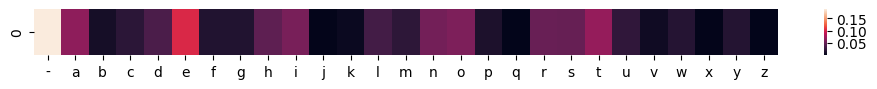

In [4]:
print(single_frq)
fig, ax = plt.subplots(figsize=(12,0.6))
sns.heatmap([single_frq],xticklabels=single_frq.index)
plt.show()

In [5]:
import string
alphabet=list(string.ascii_lowercase)
alphabet.insert(0,'-')

In [6]:
import warnings
warnings.filterwarnings('ignore')

yx_bigram=pd.DataFrame(columns=alphabet)
xy_bigram=pd.DataFrame(columns=alphabet)

for char in alphabet:
    x_list=np.array(text.index[text == char].tolist())

    if char==text.iloc[-1]:
        x_list=x_list[:-1]
    elif char==text.iloc[0]:
        x_list=x_list[1:]

    yx_freq=pd.Series(text[x_list+1]).value_counts().sort_index(ascending=True)
    yx_freq=yx_freq.div(yx_freq.sum(axis=0))
    #yx_freq plots the 

    xy_freq=pd.Series(text[x_list-1]).value_counts().sort_index(ascending=True)
    xy_freq=xy_freq.div(xy_freq.sum(axis=0))

    yx_bigram= yx_bigram.append(yx_freq,ignore_index=True)
    xy_bigram= xy_bigram.append(xy_freq,ignore_index=True)

yx_bigram.index=alphabet
xy_bigram.index=alphabet

yx_bigram=yx_bigram.fillna(0)
xy_bigram=xy_bigram.fillna(0)

In [7]:
yx_bigram

,-,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
-,0.003191,0.120848,0.036347,0.039570,0.032645,0.020615,0.036666,0.017934,0.060950,0.080991,...,0.002234,0.022274,0.076108,0.134250,0.014137,0.010180,0.071704,0.000223,0.018796,0.000000
a,0.082992,0.000000,0.018769,0.033980,0.058086,0.000356,0.007294,0.022772,0.000089,0.040918,...,0.000000,0.103184,0.101316,0.124978,0.012275,0.024106,0.012809,0.001156,0.024462,0.000890
b,0.007178,0.039757,0.005522,0.000000,0.000000,0.392601,0.000000,0.000000,0.000552,0.026505,...,0.000000,0.053562,0.020431,0.008835,0.136389,0.000000,0.000000,0.000000,0.083379,0.000000
c,0.019995,0.129424,0.000000,0.025939,0.000000,0.165361,0.000000,0.000000,0.168333,0.045663,...,0.001621,0.030532,0.001081,0.117806,0.034045,0.000000,0.000000,0.000000,0.006215,0.000000
d,0.629949,0.038474,0.000000,0.000160,0.010856,0.111430,0.000639,0.003831,0.000479,0.071839,...,0.000000,0.022510,0.016603,0.000479,0.008621,0.002395,0.000000,0.000000,0.014527,0.000000
e,0.346446,0.052139,0.001461,0.027473,0.096446,0.029518,0.008592,0.003566,0.001578,0.009002,...,0.001870,0.151216,0.061433,0.020341,0.000409,0.013912,0.005319,0.010638,0.008008,0.000000
f,0.361171,0.095646,0.000000,0.000000,0.000000,0.084582,0.031406,0.000000,0.000000,0.068522,...,0.000000,0.082084,0.001428,0.035689,0.055318,0.000000,0.000000,0.000000,0.001784,0.000000
g,0.393982,0.041416,0.000000,0.000000,0.000000,0.135929,0.000000,0.004248,0.143717,0.033628,...,0.000000,0.072212,0.012389,0.005664,0.071858,0.000000,0.000000,0.000000,0.002124,0.000000
h,0.115886,0.166989,0.001032,0.000000,0.000645,0.452058,0.000258,0.000000,0.000000,0.119499,...,0.000000,0.011227,0.002452,0.036263,0.007098,0.000000,0.000258,0.000000,0.006194,0.000000
i,0.092975,0.015322,0.012091,0.053471,0.043465,0.036794,0.020638,0.031061,0.000000,0.001147,...,0.000208,0.028247,0.100479,0.138316,0.001147,0.018241,0.000000,0.001980,0.000000,0.002293


In [8]:
xy_bigram

,-,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
-,0.003191,0.029773,0.000415,0.002361,0.125921,0.189137,0.032294,0.035517,0.028656,0.028465,...,0.000000,0.065003,0.096850,0.096850,0.013179,0.000128,0.013147,0.000574,0.067939,0.000223
a,0.336862,0.000000,0.006405,0.042608,0.021437,0.079345,0.023839,0.010407,0.115104,0.013076,...,0.000000,0.049368,0.031934,0.039317,0.006405,0.010585,0.055684,0.000890,0.001512,0.000000
b,0.628934,0.116510,0.005522,0.000000,0.000000,0.013805,0.000000,0.000000,0.004417,0.064053,...,0.000000,0.007178,0.001104,0.000552,0.023744,0.000000,0.006626,0.000000,0.000552,0.000000
c,0.335045,0.103215,0.000000,0.025939,0.000270,0.126993,0.000000,0.000000,0.000000,0.138611,...,0.000000,0.032964,0.044312,0.004053,0.033504,0.000000,0.000000,0.009727,0.000270,0.000000
d,0.163314,0.104246,0.000000,0.000000,0.010856,0.263410,0.000000,0.000000,0.000798,0.066571,...,0.000000,0.026980,0.001117,0.000479,0.009738,0.000000,0.000958,0.000000,0.000000,0.000000
e,0.037760,0.000234,0.041560,0.035773,0.040800,0.029518,0.013853,0.022446,0.204758,0.020634,...,0.000000,0.112520,0.057049,0.072831,0.006897,0.055062,0.028116,0.001812,0.006839,0.001052
f,0.410064,0.029265,0.000000,0.000000,0.001428,0.052463,0.031406,0.000000,0.000714,0.070664,...,0.000000,0.013562,0.004283,0.004996,0.007495,0.000000,0.001428,0.000000,0.000714,0.000000
g,0.198938,0.090619,0.000000,0.000000,0.008496,0.021593,0.000000,0.004248,0.000000,0.105487,...,0.000000,0.060531,0.002124,0.000000,0.057699,0.000000,0.000000,0.000000,0.000000,0.000000
h,0.246483,0.000129,0.000129,0.080397,0.000387,0.003484,0.000000,0.052394,0.000000,0.000000,...,0.000000,0.002839,0.067751,0.464447,0.000000,0.000000,0.072138,0.001420,0.000000,0.000000
i,0.264540,0.047947,0.005003,0.017615,0.046904,0.016052,0.020013,0.009902,0.096519,0.001147,...,0.000000,0.064832,0.048259,0.086304,0.013967,0.020846,0.059516,0.003648,0.004690,0.000521


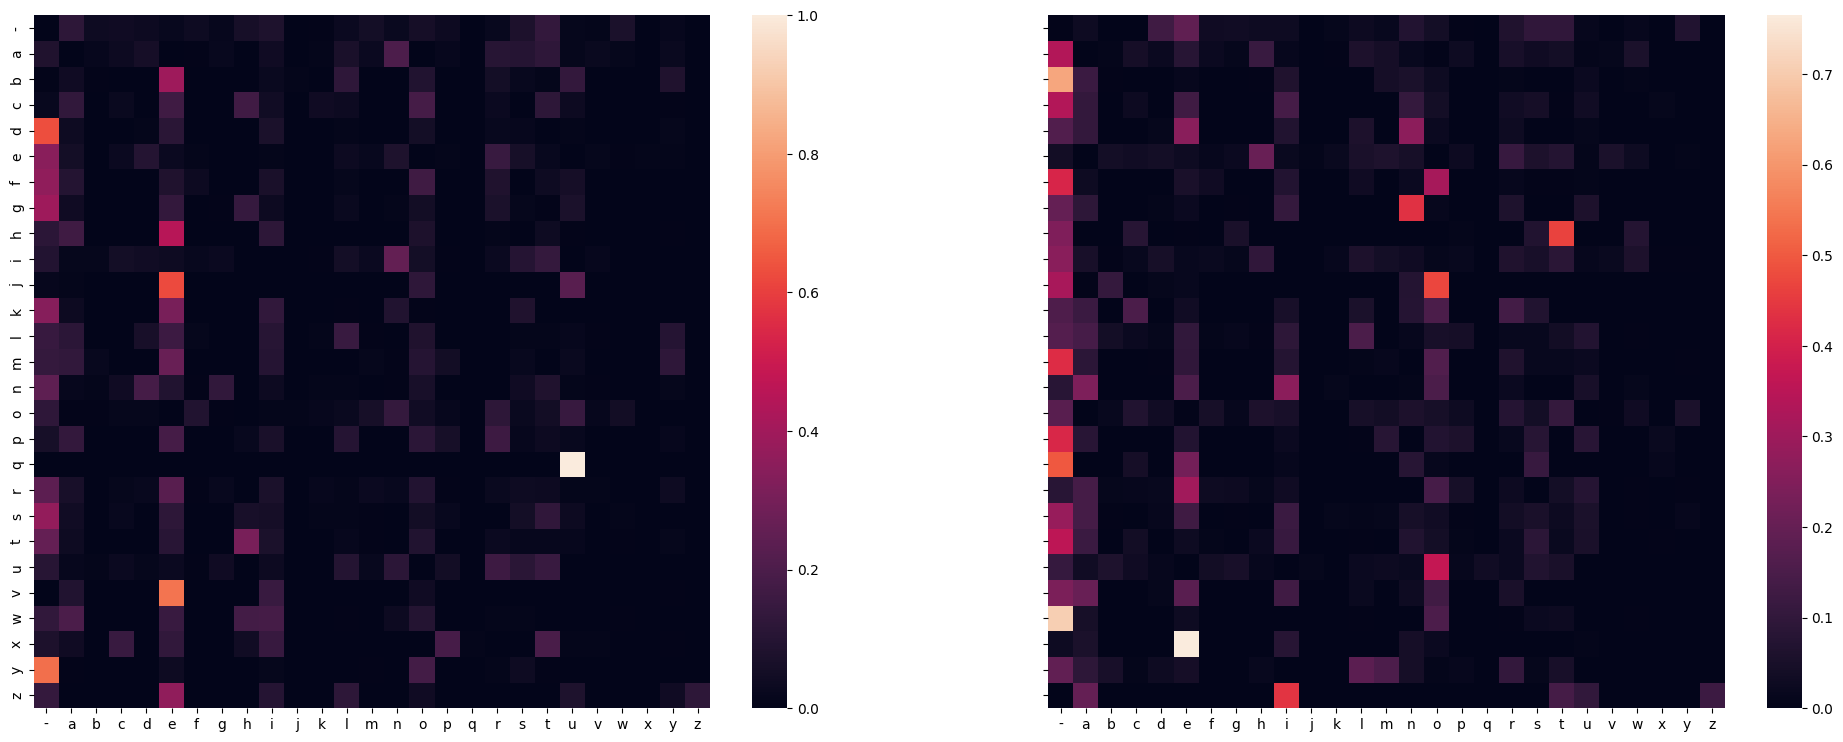

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(24,9))
sns.heatmap(yx_bigram,ax=ax1)
sns.heatmap(xy_bigram,ax=ax2)
plt.show()

In [10]:
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor('black')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.get_xlabel()

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

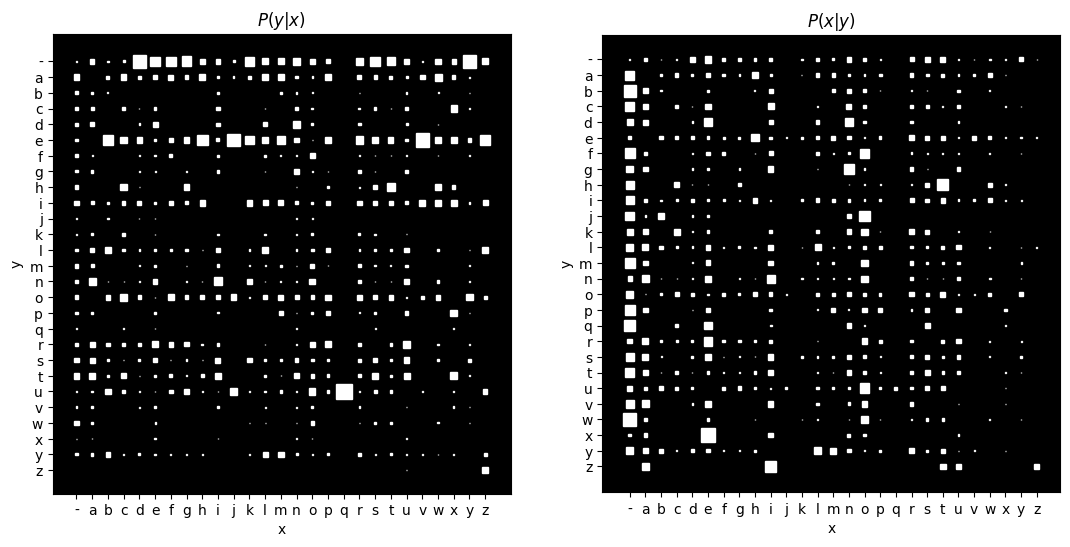

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(13,10))
hinton(np.array(yx_bigram),ax=ax1)
hinton(np.array(xy_bigram).T,ax=ax2)
plt.sca(ax1)
plt.title('$P(y|x)$')
plt.xticks(np.arange(0,len(yx_bigram.index)),yx_bigram.index)
plt.yticks(np.arange(0,len(yx_bigram.index)),yx_bigram.index)
plt.xlabel('x')
plt.ylabel('y')

plt.sca(ax2)
plt.title('$P(x|y)$')
plt.xticks(np.arange(0,len(xy_bigram.index)),xy_bigram.index)
plt.yticks(np.arange(0,len(xy_bigram.index)),yx_bigram.index)
plt.xlabel('x')
plt.ylabel('y')

plt.show()